In [1]:
# Standard library import
import os
# Third party imports
import numpy as np
import matplotlib.pyplot as plt
import napari
import pandas as pd
import plotly.express as px
from skimage import io

# Check that images exist

In [5]:
name_4_path = os.path.join('data', 'Name_4.png')
os.path.exists(name_4_path)

True

# Plot image using Plotly

(423, 512, 4)



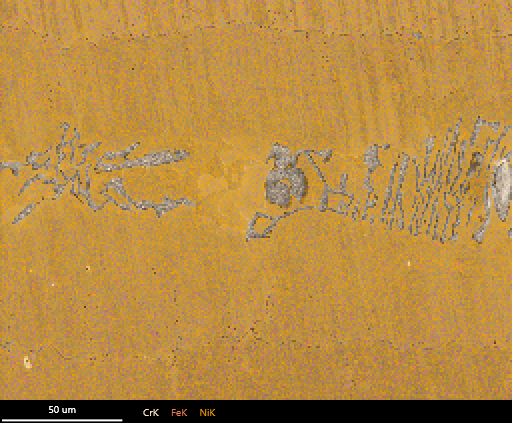

In [14]:
img_4 = io.imread(name_4_path)
print(img_4.shape)
px.imshow(img_4)

# Plot histograms for each channel using Matplotlib

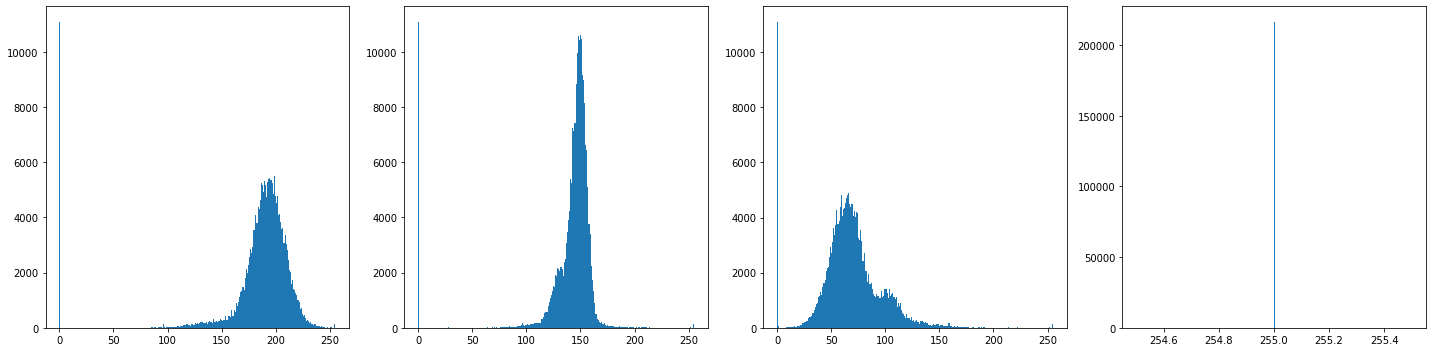

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.ravel()
for i in range(4):
    ax[i].hist(img_4[:, :, i].ravel(), bins=256)
    
plt.tight_layout()
plt.show()

# Use napari for in-depth exploration

In [15]:
# Open a napari window
viewer = napari.Viewer()

In [16]:
# Add image to viewer
viewer.add_image(img_4)

<Image layer 'img_4' at 0x1de0af880d0>

# Create test mask for alpha channel

In [32]:
# Create an array with the same number of rows and cols as image, filled with zeros
alpha_mask = np.zeros((img_4.shape[0], img_4.shape[1]))
print(alpha_mask.shape)
viewer.add_image(alpha_mask)

(423, 512)


<Image layer 'alpha_mask' at 0x1de0d99e250>

In [33]:
# Change any pixel value where channel 4 of image is less than 255 to 1
alpha_mask[img_4[:, :, 3] < 255] = 1
viewer.add_image(alpha_mask)

<Image layer 'alpha_mask [1]' at 0x1de0e9702e0>

In [34]:
# Reset mask to all zeros
alpha_mask = np.zeros((img_4.shape[0], img_4.shape[1]))
# Change any pixel value where channel 4 of image is greater than 0 to 1
alpha_mask[img_4[:, :, 3] > 0] = 1
viewer.add_image(alpha_mask)

<Image layer 'alpha_mask [2]' at 0x1de0e9fd250>

# Create mask for FeK
FeK values: [187, 94, 59, 255], [251, 126, 79, 255]

In [40]:
# Reset mask to all zeros
fek_mask = np.zeros((img_4.shape[0], img_4.shape[1]))
# Change any pixel value where channel 0 is 247 to 1
fek_mask[
    (img_4[:, :, 0] > 200) & (img_4[:, :, 0] < 255) &
    (img_4[:, :, 1] > 50) & (img_4[:, :, 1] < 150) &
    (img_4[:, :, 2] > 50) & (img_4[:, :, 2] < 100)
] = 1
viewer.add_image(fek_mask)

<Image layer 'fek_mask [1]' at 0x1de0ea098b0>